# Homework 2

**Joris LIMONIER**

## Comparison of imputation methods

### Load the data


In [1]:
# Load the VIM package
library(VIM)
library(mice)

# Run the assignment2 file
source("exercise1.R")

Loading required package: colorspace

Loading required package: grid

VIM is ready to use.


Suggestions and bug-reports can be submitted at: https://github.com/statistikat/VIM/issues


Attaching package: ‘VIM’


The following object is masked from ‘package:datasets’:

    sleep



Attaching package: ‘mice’


The following object is masked from ‘package:stats’:

    filter


The following objects are masked from ‘package:base’:

    cbind, rbind




In [2]:
# Load the data
data(SBS5242)
xna <- SBS5242


In [3]:
xna

,PW,BWS_F,Umsatz,PERSA,BEZWD,BEZWDVK,BESCH,USB,ISACH
1,43888.85242,35081.07414,3737.974701,11815.3610831,37577.19455,379.0521485,310.094825,30.48368699,6575.334081
2,1449.40170,1239.13170,120.099200,5.9457950,1251.43080,8.6653528,18.473580,-0.41414050,58.024414
3,1009.61541,944.93722,79.832300,163.2859277,857.75827,4.2969994,24.738311,0.35008017,12.331909
4,1218.17072,942.29390,104.851729,1.9011026,1063.73052,20.4941952,30.444217,-0.37563076,513.910413
5,517.36342,450.46195,41.326691,18.0060038,448.09227,2.0590045,20.181749,-0.09648481,21.445781
6,67.19103,44.91809,5.003297,-0.6017785,62.71034,-0.2673511,13.851994,-0.68410116,25.903779
7,1683.01369,1381.60557,140.964884,11.9743919,1438.19391,19.2082483,40.427033,0.30442450,810.758145
8,2141.84021,1551.84794,186.967366,39.7938704,1896.32869,18.1956008,37.925490,0.36126771,62.048589
9,1266.61864,1057.68366,102.961968,42.5625459,1098.48268,5.2610804,44.765935,0.93543718,25.187548
10,6757.11323,5884.14928,547.471849,719.8159410,5747.90534,30.3596312,177.138206,6.84392685,96.938520


### Visualize missing values


 Variables sorted by number of missings: 
 Variable      Count
       PW 0.01908397
    BWS_F 0.01908397
   Umsatz 0.01908397
    PERSA 0.01908397
    BEZWD 0.01908397
  BEZWDVK 0.01908397
    BESCH 0.01908397
      USB 0.01908397
    ISACH 0.01908397


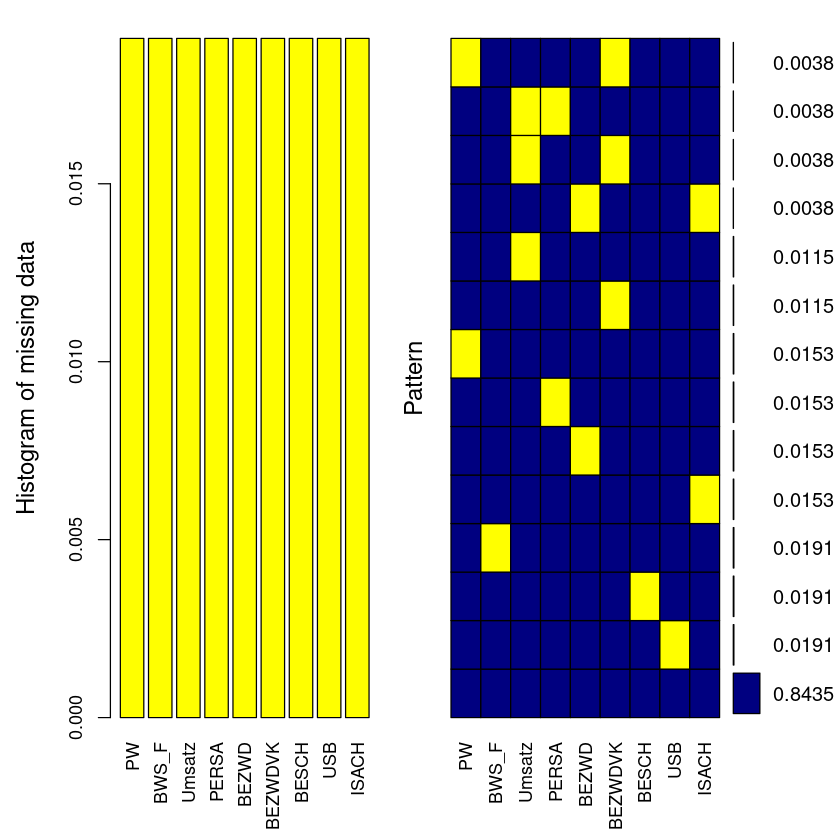

In [4]:
# Visualize the missing values with the function aggr of the VIM package
aggr(xna,
  col = c("navyblue", "yellow"),
  numbers = TRUE,
  sortVars = TRUE,
  labels = names(xna),
  cex.axis = .9,
  gap = 3,
  ylab = c("Histogram of missing data", "Pattern")
)


In [5]:
# Compute the global percentage of missing values in the dataset
sum(is.na(xna))/length(xna)

[1] 0.01908397

### Introduce 30% missing values in the dataset

In [6]:
# Introduce 30% synthetic missing values in the dataset with the method synthetic_mcar
xna_miss <- synthetic_mcar(xna, p = 0.3)
head(xna_miss$xna_miss, n = 10)


,PW,BWS_F,Umsatz,PERSA,BEZWD,BEZWDVK,BESCH,USB,ISACH
1,NA,35081.07414,3737.974701,11815.3610831,37577.19455,379.0521485,310.09482,30.48368699,6575.33408
2,1449.4017,1239.13170,120.099200,5.9457950,1251.43080,8.6653528,18.47358,-0.41414050,58.02441
3,NA,NA,79.832300,163.2859277,857.75827,4.2969994,24.73831,0.35008017,12.33191
4,NA,942.29390,104.851729,1.9011026,1063.73052,20.4941952,30.44422,-0.37563076,513.91041
5,517.3634,450.46195,41.326691,18.0060038,448.09227,2.0590045,20.18175,-0.09648481,21.44578
6,NA,44.91809,5.003297,-0.6017785,62.71034,-0.2673511,13.85199,-0.68410116,25.90378
7,NA,NA,140.964884,11.9743919,1438.19391,19.2082483,40.42703,0.30442450,810.75815
8,2141.8402,NA,186.967366,39.7938704,1896.32869,18.1956008,37.92549,0.36126771,62.04859
9,1266.6186,1057.68366,102.961968,42.5625459,1098.48268,5.2610804,44.76593,0.93543718,25.18755
10,6757.1132,5884.14928,547.471849,719.8159410,5747.90534,30.3596312,177.13821,6.84392685,96.93852


### Explain why the synthetic missing values introduced as such are MCAR
The synthetic missing values are MCAR because they are randomly distributed in the dataset. The missing values are not related to any other variable or value in the dataset. We simply randomly selected a percentage of the dataset and set them to NA.

### Compare three imputation methods (mean imputation, another single imputation, multiple imputation) by computing the MSE for the synthetic missing values

In [7]:
# Compute the mean squared error for the mean imputation method
mse_mean_imp <- mean((mean_imputation(xna_miss$xna_miss) - xna)^2, na.rm = TRUE)

# Compute the mean squared error for the median imputation method
mse_median_imp <- mean((median_imputation(xna_miss$xna_miss) - xna)^2, na.rm = TRUE)

# Compute the mean squared error for the multiple imputation method
mse_multiple_imp <- mean(as.matrix((multiple_imputation(xna_miss$xna_miss) - xna)^2), na.rm = TRUE)

Warning message:
“Number of logged events: 495”


In [8]:
diff_ <- (multiple_imputation(xna_miss$xna_miss) - xna)^2


Warning message:
“Number of logged events: 495”


In [9]:
mse_mean_imp
mse_median_imp
mse_multiple_imp

[1] 1513548

[1] 1705385

[1] 195549.4

In [10]:
# Print all the MSE rounded with their corresponding imputation method
print(paste("MSE for the mean imputation method:", round(mse_mean_imp, 2)))
print(paste("MSE for the median imputation method:", round(mse_median_imp, 2)))
print(paste("MSE for the multiple imputation method:", round(mse_multiple_imp, 2)))


[1] "MSE for the mean imputation method: 1513548.13"
[1] "MSE for the median imputation method: 1705384.98"
[1] "MSE for the multiple imputation method: 195549.45"


#### Which imputation method is the best? Why?
The multiple imputation method is the best because it has the lowest MSE. This is because the multiple imputation method uses the information from the other variables to impute the missing values.

In [11]:
# To analyse the stochasticity implied by the introduction of missing values, repeat the procedure (introduction of synthetic missing values and imputation) several times and plot the distribution of the MSEs by showing a boxplot.
# Set the number of repetitions
nb_repetitions <- 10

# Set the percentage of missing values
perc_na <- 0.3

# Set the seed
set.seed(123)

# Create a vector to store the MSEs
mse_mean_imp <- rep(NA, nb_repetitions)
mse_median_imp <- rep(NA, nb_repetitions)
mse_multiple_imp <- rep(NA, nb_repetitions)

# Repeat the procedure nb_repetitions times
for (i in 1:nb_repetitions) {
  # Introduce synthetic missing values
  xna_miss <- synthetic_mcar(xna, p = perc_na)
  
  # Compute the MSE for the mean imputation method
  mse_mean_imp[i] <- mean((mean_imputation(xna_miss$xna_miss) - xna)^2, na.rm = TRUE)
  
  # Compute the MSE for the median imputation method
  mse_median_imp[i] <- mean((median_imputation(xna_miss$xna_miss) - xna)^2, na.rm = TRUE)
  
  # Compute the MSE for the multiple imputation method
  mse_multiple_imp[i] <- mean(as.matrix((multiple_imputation(xna_miss$xna_miss) - xna)^2), na.rm = TRUE)
}


Warning message:
“Number of logged events: 248”
Warning message:
“Number of logged events: 244”
Warning message:
“Number of logged events: 1229”
Warning message:
“Number of logged events: 495”
Warning message:
“Number of logged events: 499”
Warning message:
“Number of logged events: 244”
Warning message:
“Number of logged events: 1229”
Warning message:
“Number of logged events: 495”
Warning message:
“Number of logged events: 499”
Warning message:
“Number of logged events: 244”


    mean_imp         median_imp       multiple_imp   
 Min.   : 208632   Min.   : 289199   Min.   :  1190  
 1st Qu.: 767756   1st Qu.: 911578   1st Qu.: 31538  
 Median :1196772   Median :1367168   Median :104364  
 Mean   : 942911   Mean   :1093828   Mean   :107533  
 3rd Qu.:1205610   3rd Qu.:1380795   3rd Qu.:160009  
 Max.   :1468909   Max.   :1660006   Max.   :339668  

[1] "Standard deviation of the MSEs for the mean imputation method: 441063.76"
[1] "Standard deviation of the MSEs for the median imputation method: 480546.23"
[1] "Standard deviation of the MSEs for the multiple imputation method: 104442.49"


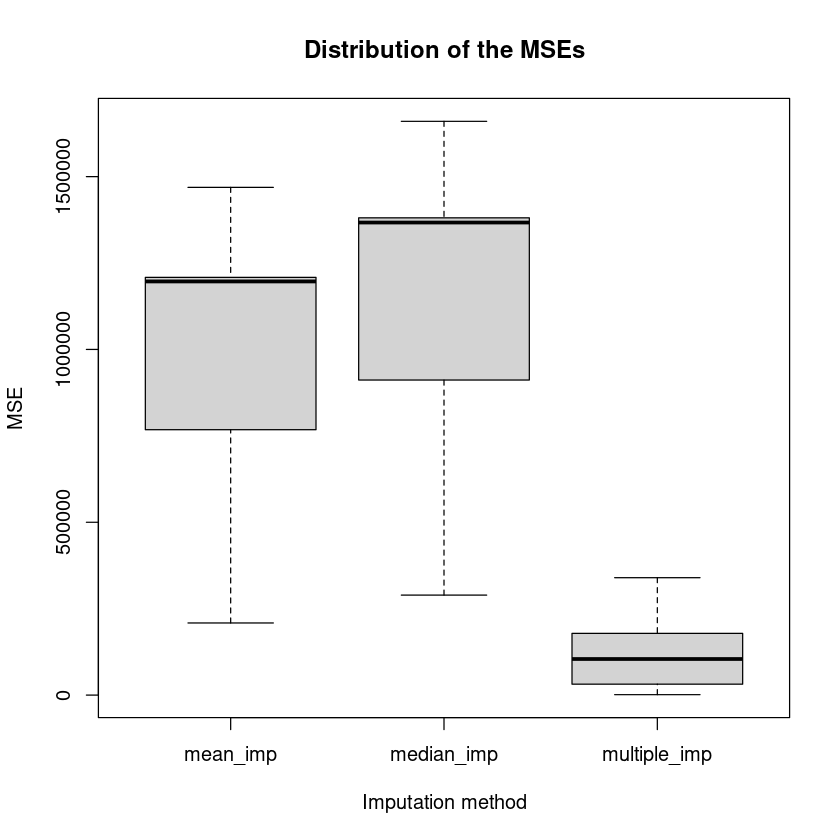

In [12]:
# Create a data frame with the MSEs
mse <- data.frame(
  mean_imp = mse_mean_imp,
  median_imp = mse_median_imp,
  multiple_imp = mse_multiple_imp
)

# Plot the boxplot
boxplot(mse, main = "Distribution of the MSEs", xlab = "Imputation method", ylab = "MSE")

# Compute the summary of the MSEs
summary(mse)

# Compute the standard deviation of the MSEs for the mean imputation method 
# and compare it with the standard deviation of the MSEs for the median imputation method
# and the multiple imputation method.
print(paste("Standard deviation of the MSEs for the mean imputation method:", round(sd(mse$mean_imp), 2)))
print(paste("Standard deviation of the MSEs for the median imputation method:", round(sd(mse$median_imp), 2)))
print(paste("Standard deviation of the MSEs for the multiple imputation method:", round(sd(mse$multiple_imp), 2)))


In conclusion, the multiple imputation method has the lowest mean of the MSE's. This means that the multiple imputation method is the most accurate method.

We also see that the multiple imputation method has the lowest standard deviation of the MSE's. This means that the multiple imputation method is the most robust method.